# Data Mining (Fall 2024)
## Homework 1 
### Data Wrangling with Baltimore City 911 Report Data

In [9]:
import pandas as pd

# Load the dataset
file_path = './Baltimore911.csv'
baltimore_911_data = pd.read_csv(file_path)

# Get the total number of rows and columns
total_rows, total_columns = baltimore_911_data.shape


# Create a dataset profile table with basic information
dataset_profile = pd.DataFrame({
    'Description': ['Total Rows (Call Instances)', 'Total Columns (Call Features)'],
    'Value': [total_rows, total_columns]
})

print(dataset_profile)


                     Description   Value
0    Total Rows (Call Instances)  292761
1  Total Columns (Call Features)      16


C:\Users\Unknown1\AppData\Local\Temp\ipykernel_15336\1898479268.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  baltimore_911_data = pd.read_csv(file_path)


In [46]:
# First, let's categorize the columns based on their data types
# We'll define numeric, symbolic, temporal, and spatial categories accordingly
# import ace_tools as tools;
column_info = []

# Loop through each column and gather the required information
for column in baltimore_911_data.columns:
    col_data = baltimore_911_data[column]
    col_type = col_data.dtype
    missingness = col_data.isna().sum() / total_rows * 100

    if pd.api.types.is_numeric_dtype(col_data):
        column_type = 'Numeric'
        min_val = col_data.min()
        max_val = col_data.max()
        mean_val = col_data.mean()
        median_val = col_data.median()
        std_dev = col_data.std()
        col_summary = f"Min: {min_val}, Max: {max_val}, Mean: {mean_val}, Median: {median_val}, Std Dev: {std_dev}"
        unique_values = 'N/A'
        top_3_values = 'N/A'
    elif pd.api.types.is_datetime64_any_dtype(col_data):
        column_type = 'Temporal'
        col_summary = 'N/A'
        unique_values = 'N/A'
        top_3_values = 'N/A'
    else:
        column_type = 'Symbolic/Discrete'
        unique_values = col_data.nunique()
        top_3_values = col_data.value_counts().head(3).to_dict()
        col_summary = 'N/A'

    column_info.append({
        'Column': column,
        'Type': column_type,
        'Summary': col_summary,
        'Unique Values': unique_values,
        'Top 3 Values': top_3_values,
        'Missingness (%)': missingness
    })

# Convert the results into a DataFrame for better visualization
column_info_df = pd.DataFrame(column_info)
print(column_info_df)
# tools.display_dataframe_to_user(name="Column Overview", dataframe=column_info_df)


             Column               Type  \
0         CrimeDate           Temporal   
1         CrimeTime  Symbolic/Discrete   
2         CrimeCode  Symbolic/Discrete   
3          Location  Symbolic/Discrete   
4       Description  Symbolic/Discrete   
5    Inside/Outside  Symbolic/Discrete   
6            Weapon  Symbolic/Discrete   
7              Post  Symbolic/Discrete   
8          District  Symbolic/Discrete   
9      Neighborhood  Symbolic/Discrete   
10        Longitude            Numeric   
11         Latitude            Numeric   
12       Location 1            Numeric   
13          Premise  Symbolic/Discrete   
14        vri_name1  Symbolic/Discrete   
15  Total Incidents            Numeric   
16             Year            Numeric   
17            Month            Numeric   
18        DayOfWeek            Numeric   

                                              Summary Unique Values  \
0                                                 N/A           N/A   
1                

In [11]:
import pandas as pd
from ydata_profiling import ProfileReport

# Load the dataset
baltimore_911_data = pd.read_csv('Baltimore911.csv')

# Create a profile report
profile = ProfileReport(baltimore_911_data, title="Baltimore 911 Call Data Profile", explorative=True)

# Save the report as an HTML file
profile.to_file("Baltimore_911_Data_Profile_Report.html")

C:\Users\Unknown1\AppData\Local\Temp\ipykernel_15336\3694587454.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  baltimore_911_data = pd.read_csv('Baltimore911.csv')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Profiling report is on Baltimore_911_Data_Profile_Report.html

From the initial data profile, here are some observations that stand out:

1. CrimeDate & CrimeTime: Stored as discrete/symbolic variables, not temporal. Likely stored as strings, limiting chronological sorting and temporal analysis.
2. Missing Data: Minimal missing data, less than 0.5%  in location data, potentially important for spatial analyis. 
3. Location Data: Over 27,000 unique locations, indicating highly specific data, useful for localized analysis.
	is.


### Based on the observation Necessory Preprocessing data

In [12]:
import pandas as pd

# Step 1: Convert CrimeDate and CrimeTime to proper datetime format
baltimore_911_data['CrimeDate'] = pd.to_datetime(baltimore_911_data['CrimeDate'], errors='coerce')
baltimore_911_data['CrimeTime'] = pd.to_datetime(baltimore_911_data['CrimeTime'], format='%H:%M:%S', errors='coerce').dt.time

# Step 2: Handle Missing Values
# Using .loc[] to avoid SettingWithCopyWarning
baltimore_911_data.loc[:, 'Location'] = baltimore_911_data['Location'].fillna('Unknown Location')

# Step 3: Remove duplicates
baltimore_911_data = baltimore_911_data.drop_duplicates()

# Step 4: Standardize and Clean Data
# Clean Location and Crime Descriptions (strip whitespace, convert to uppercase for consistency)
baltimore_911_data.loc[:, 'Location'] = baltimore_911_data['Location'].str.strip().str.upper()
baltimore_911_data.loc[:, 'Description'] = baltimore_911_data['Description'].str.strip().str.upper()

# After processing, let's display the cleaned dataset and a brief summary
processed_summary = {
    'Total Rows (After Cleaning)': baltimore_911_data.shape[0],
    'Total Columns': baltimore_911_data.shape[1],
    'Missing Values in CrimeDate': baltimore_911_data['CrimeDate'].isna().sum(),
    'Missing Values in CrimeTime': baltimore_911_data['CrimeTime'].isna().sum(),
    'Missing Values in Location': baltimore_911_data['Location'].isna().sum()
}

# Convert summary to a DataFrame for display
processed_summary_df = pd.DataFrame(list(processed_summary.items()), columns=['Description', 'Value'])
print(processed_summary_df)



                   Description   Value
0  Total Rows (After Cleaning)  281321
1                Total Columns      16
2  Missing Values in CrimeDate       0
3  Missing Values in CrimeTime      26
4   Missing Values in Location       0


#### 2a. plots to describe the temporal pattern year-to-year of the overall crime incidence aggregating from all geo-locations


C:\Users\Unknown1\AppData\Local\Temp\ipykernel_15336\3251796851.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baltimore_911_data['Year'] = baltimore_911_data['CrimeDate'].dt.year


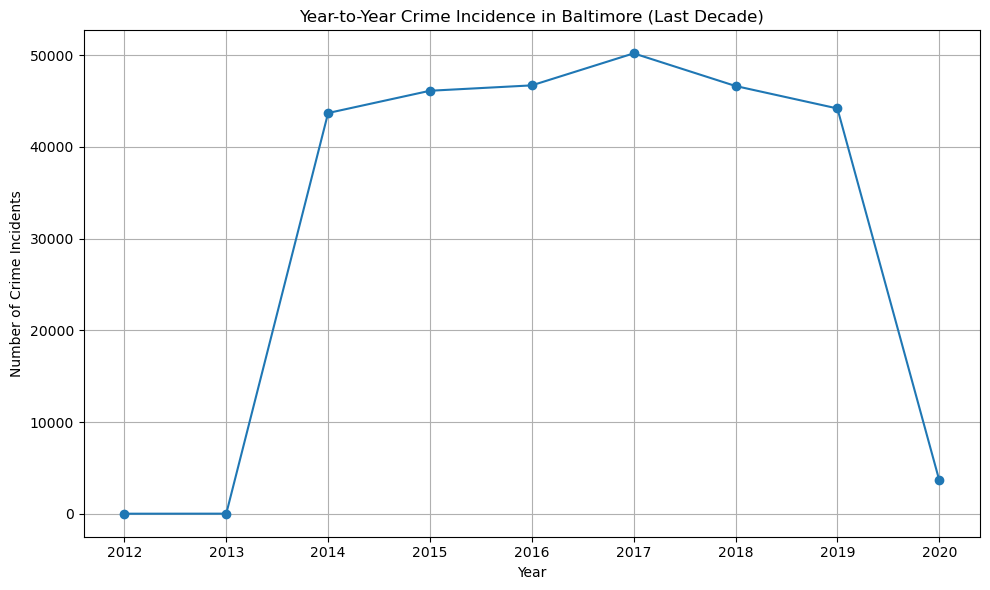

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
# Step 1: Extract the 'Year' from the 'CrimeDate' column
baltimore_911_data['Year'] = baltimore_911_data['CrimeDate'].dt.year

# Step 2: Filter the data for the last decade (starting from 2012)
last_decade_data = baltimore_911_data[baltimore_911_data['Year'] >= 2012]

# Step 3: Aggregate by year for the last decade
last_decade_yearly_crime = last_decade_data.groupby('Year').size()

# Step 4: Create a line plot for year-to-year crime incidents for the last decade
plt.figure(figsize=(10, 6))
plt.plot(last_decade_yearly_crime.index, last_decade_yearly_crime.values, marker='o')
plt.title('Year-to-Year Crime Incidence in Baltimore (Last Decade)')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.grid(True)
plt.tight_layout()
plt.savefig("./Artifacts/Yearly_Crime_Trends_Last_Decade.png")
# Show the plot
plt.show()

#### 2b. plots to describe the temporal pattern monthly of the overall crime incidence aggregating from all geo-locations

C:\Users\Unknown1\AppData\Local\Temp\ipykernel_15336\188723458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baltimore_911_data['Month'] = baltimore_911_data['CrimeDate'].dt.month


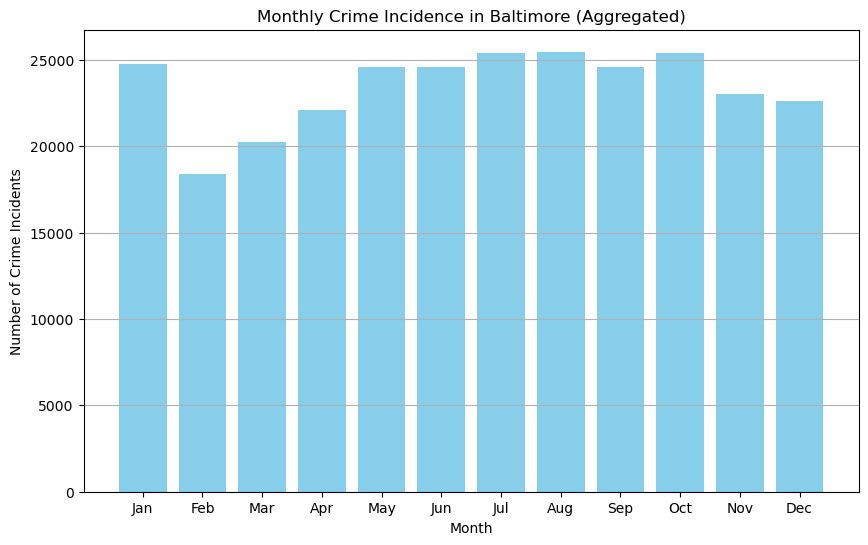

In [14]:
# Extract month from CrimeDate for monthly aggregation
baltimore_911_data['Month'] = baltimore_911_data['CrimeDate'].dt.month

# Aggregate by month
monthly_crime = baltimore_911_data.groupby('Month').size()

# Create a bar plot for monthly crime incidents
plt.figure(figsize=(10, 6))
plt.bar(monthly_crime.index, monthly_crime.values, color='skyblue')
plt.title('Monthly Crime Incidence in Baltimore (Aggregated)')
plt.xlabel('Month')
plt.ylabel('Number of Crime Incidents')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, axis='y')
plt.savefig("./Artifacts/Monthly_Crime_Trends.png")
# Show the plot
plt.show()


#### 2c. plots to describe the temporal pattern day-of-week of the overall crime incidence aggregating from all geo-locations

C:\Users\Unknown1\AppData\Local\Temp\ipykernel_15336\2592684719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baltimore_911_data['DayOfWeek'] = baltimore_911_data['CrimeDate'].dt.dayofweek


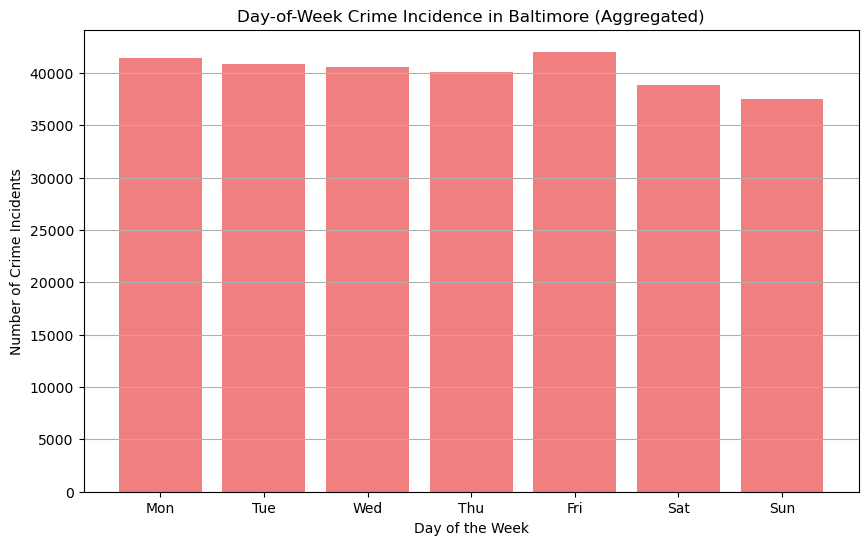

In [15]:
# Extract day of the week from CrimeDate for aggregation (0 = Monday, 6 = Sunday)
baltimore_911_data['DayOfWeek'] = baltimore_911_data['CrimeDate'].dt.dayofweek

# Aggregate by day of the week
day_of_week_crime = baltimore_911_data.groupby('DayOfWeek').size()

# Create a bar plot for day-of-week crime incidents
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_crime.index, day_of_week_crime.values, color='lightcoral')
plt.title('Day-of-Week Crime Incidence in Baltimore (Aggregated)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crime Incidents')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True, axis='y')
plt.savefig("./Artifacts/Day_Of_Week_Crime_Trends.png")
# Show the plot
plt.show()


#### 3. Generate a plot describing the distribution of crime type aggregating from all geo-locations and all time periods;


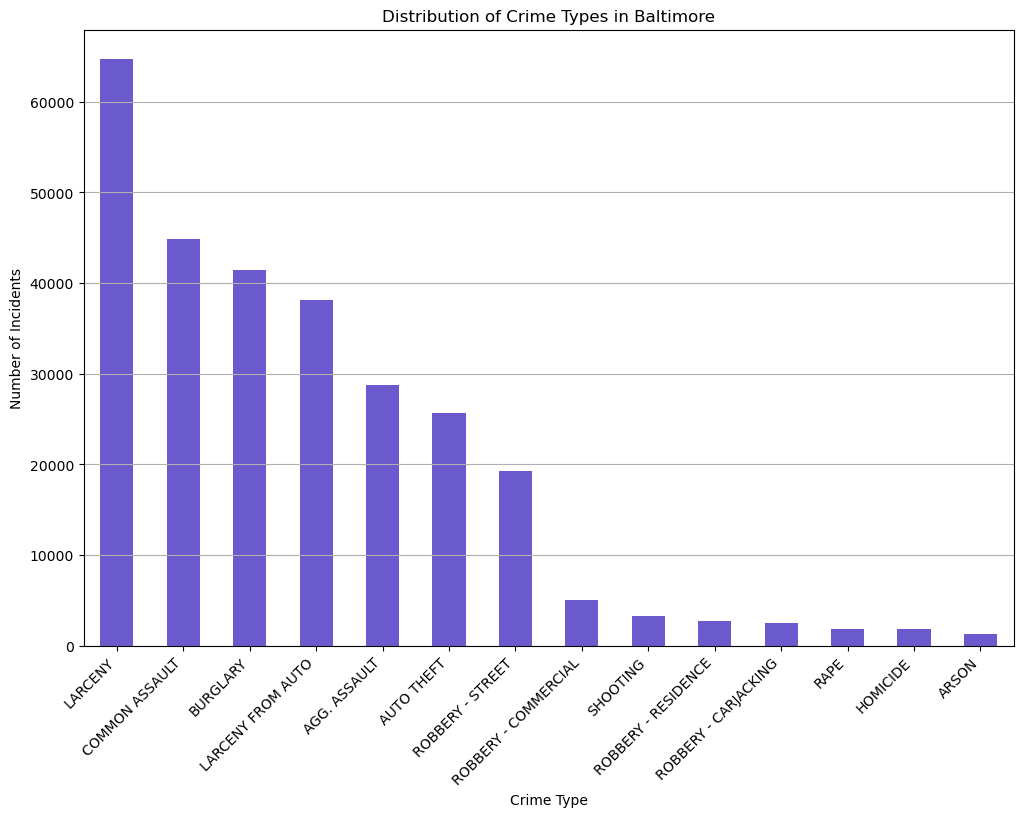

In [16]:
# Aggregate the data by crime description (crime type)
crime_type_distribution = baltimore_911_data['Description'].value_counts()

# Create a bar plot for the distribution of crime types
plt.figure(figsize=(12, 8))
crime_type_distribution.plot(kind='bar', color='slateblue')
plt.title('Distribution of Crime Types in Baltimore')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.savefig("./Artifacts/Crime_Type_Distribution.png")
# Show the plot
plt.show()


#### 4a. Plot to illustrate how crime type distributions might vary from year-to-year aggregating across all locations.

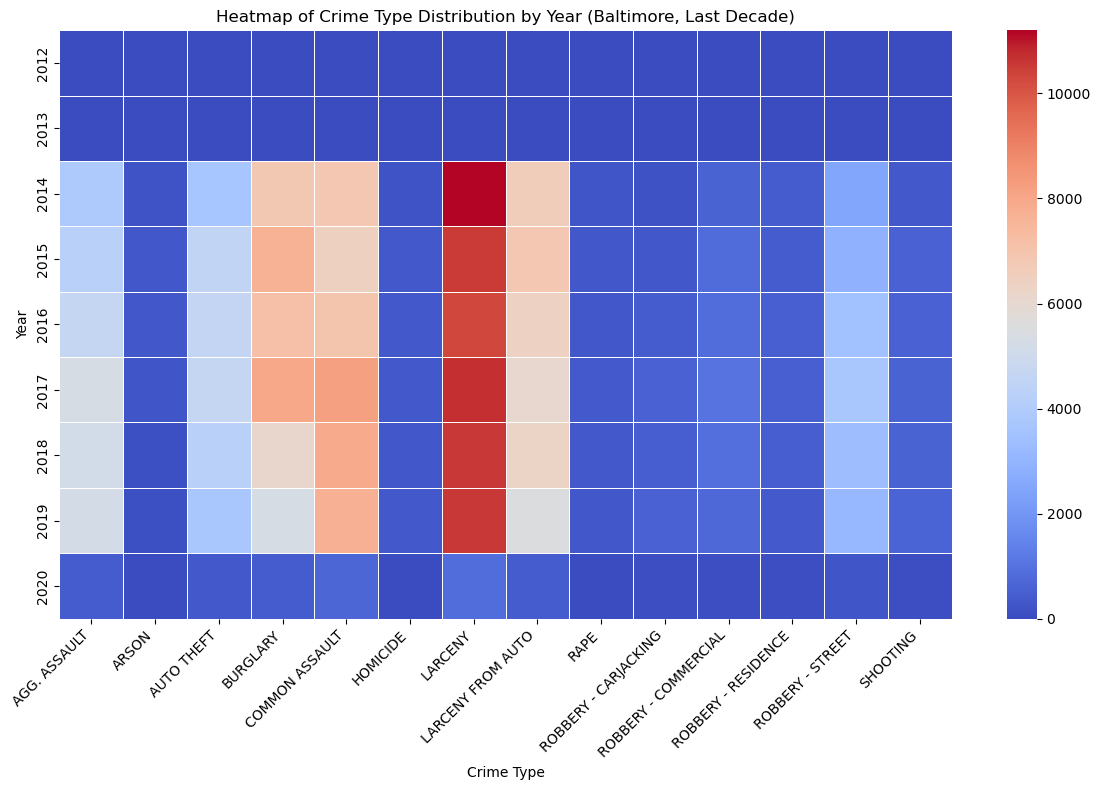

In [21]:
import seaborn as sns

# Aggregate data for the heatmap: Crime types by year for the last decade
yearly_crime_type_heatmap_data = last_decade_data.groupby(['Year', 'Description']).size().unstack(fill_value=0)

# Plotting the heatmap for year-to-year crime type variations
plt.figure(figsize=(12, 8))
sns.heatmap(yearly_crime_type_heatmap_data, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Crime Type Distribution by Year (Baltimore, Last Decade)')
plt.xlabel('Crime Type')
plt.ylabel('Year')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.savefig("./Artifacts/Yearly_Crime_Type_Heatmap.png")
plt.show()


#### 4b. Plot to illustrate how crime type distributions might vary from month-to-month aggregating across all locations.

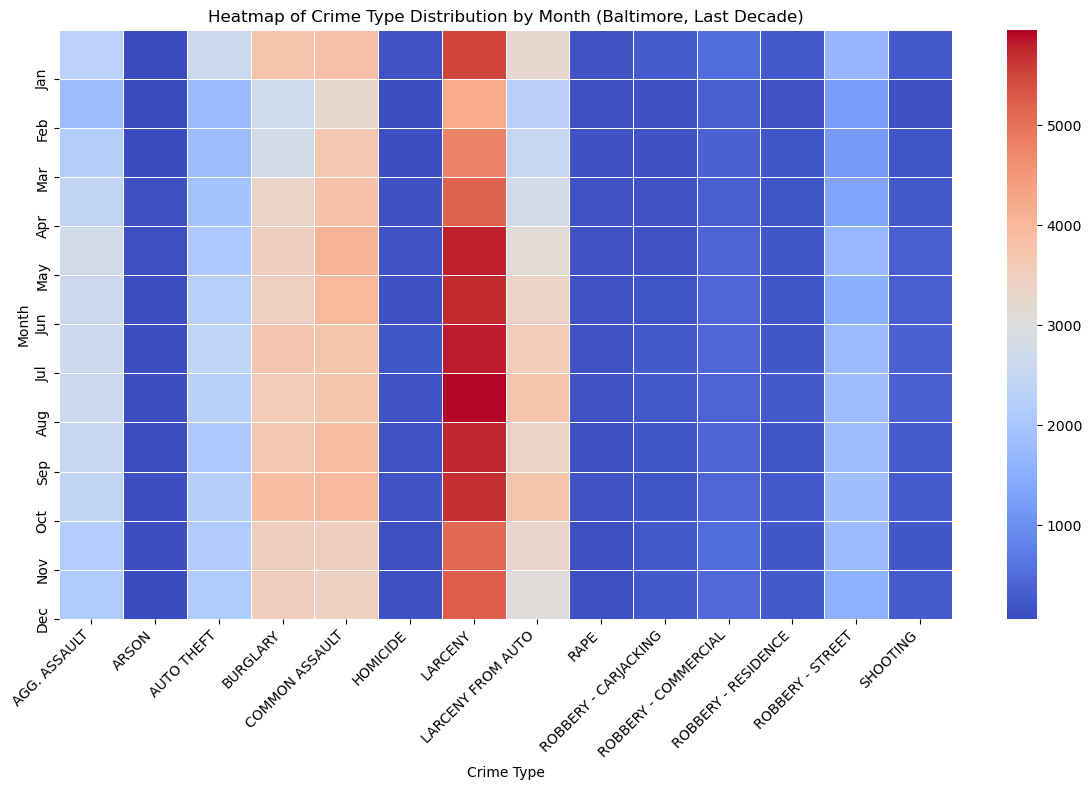

In [23]:
import seaborn as sns

# For the heatmap, we'll aggregate crime type counts by year and month first
# We will create a heatmap for month-to-month crime variation across the last decade

# Aggregate data for the heatmap: Crime types by month
monthly_crime_type_heatmap_data = baltimore_911_data.groupby(['Month', 'Description']).size().unstack(fill_value=0)

# Plotting the heatmap for month-to-month crime type variations
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_crime_type_heatmap_data, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Crime Type Distribution by Month (Baltimore, Last Decade)')
plt.xlabel('Crime Type')
plt.ylabel('Month')
plt.xticks(rotation=45, ha='right')
plt.yticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.tight_layout()
plt.savefig("./Artifacts/Monthly_Crime_Type_Heatmap.png")
plt.show()


#### 4b. Plot to illustrate how crime type distributions might vary from day-of-week aggregating across all locations.

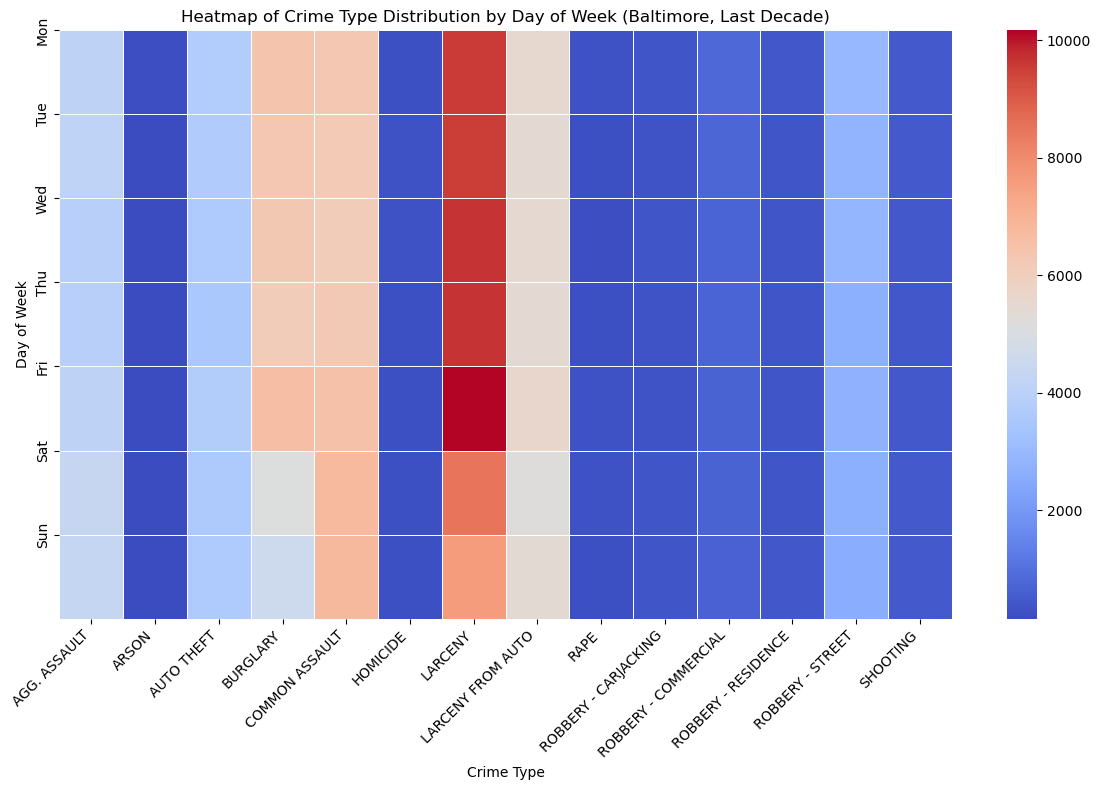

In [27]:
# Aggregate data for the heatmap: Crime types by day of the week
day_of_week_crime_type_heatmap_data = baltimore_911_data.groupby(['DayOfWeek', 'Description']).size().unstack(fill_value=0)

# Plotting the heatmap for day-of-week crime type variations
plt.figure(figsize=(12, 8))
sns.heatmap(day_of_week_crime_type_heatmap_data, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Crime Type Distribution by Day of Week (Baltimore, Last Decade)')
plt.xlabel('Crime Type')
plt.ylabel('Day of Week')
plt.xticks(rotation=45, ha='right')
plt.yticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Show the plot
plt.tight_layout()
plt.savefig("./Artifacts/Day_Of_Week_Crime_Type_Heatmap.png")
plt.show()


#### 5. Design a dashboard that allows users like Gary to explore the spatial and temporal patterns of crime. You may get inspiration from tasks 2-4, but feel free to add insights.

#### 5.a Create a real dynamic dashboard that allows users to change parameters such as location and time period. 


In [ ]:
import dash
from dash import dcc, html
import plotly.express as px

# Assuming data is preprocessed into necessary formats
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Baltimore Crime Dashboard"),
    
    # Total Incidents Overview
    html.Div([
        html.H3(f"Total Incidents: {len(last_decade_data)}"),
    ], style={'textAlign': 'center'}),

    # Dropdown for Location Selection
    dcc.Dropdown(
        id='location-dropdown',
        options=[{'label': loc, 'value': loc} for loc in last_decade_data['Location'].unique()],
        value='All Locations',
        placeholder='Select a Location'
    ),

    # Date Range Slider
    dcc.DatePickerRange(
        id='date-picker-range',
        start_date=last_decade_data['CrimeDate'].min(),
        end_date=last_decade_data['CrimeDate'].max()
    ),

    # Bar Chart for Crime Type
    dcc.Graph(id='crime-type-bar'),

    # Line Graph for Temporal Trends
    dcc.Graph(id='temporal-line-graph'),

    # Map for Spatial Analysis
    dcc.Graph(id='crime-map')

])

@app.callback(
    dash.dependencies.Output('temporal-line-graph', 'figure'),
    [dash.dependencies.Input('location-dropdown', 'value'),
     dash.dependencies.Input('date-picker-range', 'start_date'),
     dash.dependencies.Input('date-picker-range', 'end_date')]
)
def update_temporal_line_graph(selected_location, start_date, end_date):
    # Filter data based on the selected time period and location
    filtered_data = last_decade_data[(last_decade_data['CrimeDate'] >= start_date) & (last_decade_data['CrimeDate'] <= end_date)]
    
    if selected_location != 'All Locations':
        filtered_data = filtered_data[filtered_data['Location'] == selected_location]
    
    # Aggregate data by year
    yearly_trends = filtered_data.groupby(filtered_data['CrimeDate'].dt.year).size().reset_index(name='Count')
    
    # Create the line plot
    fig = px.line(yearly_trends, x='CrimeDate', y='Count', title='Yearly Crime Trends')
    
    return fig


@app.callback(
    dash.dependencies.Output('crime-type-bar', 'figure'),
    [dash.dependencies.Input('location-dropdown', 'value'),
     dash.dependencies.Input('date-picker-range', 'start_date'),
     dash.dependencies.Input('date-picker-range', 'end_date')]
)
def update_crime_type_bar(selected_location, start_date, end_date):
    # Filter data based on location and time period
    filtered_data = last_decade_data[(last_decade_data['CrimeDate'] >= start_date) & (last_decade_data['CrimeDate'] <= end_date)]
    
    if selected_location != 'All Locations':
        filtered_data = filtered_data[filtered_data['Location'] == selected_location]
    
    # Check if filtered data is empty
    if filtered_data.empty:
        return px.bar(title="No data available for the selected filters")
    
    # Aggregate crime type distribution
    crime_type_distribution = filtered_data['Description'].value_counts().reset_index()
    crime_type_distribution.columns = ['Crime Type', 'Count']  # Rename columns for clarity
    
    # Create the bar plot
    fig = px.bar(crime_type_distribution, x='Crime Type', y='Count', title='Crime Type Distribution')
    
    return fig

@app.callback(
    dash.dependencies.Output('crime-map', 'figure'),
    [dash.dependencies.Input('location-dropdown', 'value'),
     dash.dependencies.Input('date-picker-range', 'start_date'),
     dash.dependencies.Input('date-picker-range', 'end_date')]
)
def update_crime_map(selected_location, start_date, end_date):
    # Filter data based on the selected time period and location
    filtered_data = last_decade_data[(last_decade_data['CrimeDate'] >= start_date) & (last_decade_data['CrimeDate'] <= end_date)]
    
    if selected_location != 'All Locations':
        filtered_data = filtered_data[filtered_data['Location'] == selected_location]
    
    # Check if the dataset contains Latitude and Longitude columns
    if 'Latitude' in filtered_data.columns and 'Longitude' in filtered_data.columns:
        # Create the map with crime locations
        fig = px.scatter_mapbox(filtered_data, lat='Latitude', lon='Longitude', color='Description',
                                title='Crime Incidents Map', zoom=10, height=600)
        fig.update_layout(mapbox_style="open-street-map")
    else:
        # Placeholder message if coordinates are missing
        fig = px.scatter_mapbox([], lat=[], lon=[], title="No Geo Data Available", height=600)
        fig.update_layout(mapbox_style="open-street-map")
    
    return fig

    



# Run the dashboard
if __name__ == '__main__':
    app.run_server(debug=True)
